In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,8)
from IPython.display import clear_output
from ipywidgets import widgets

In [2]:
class Model:
    def __init__(self,n,N,T,r_0): #n is number of trajectories, N is number of steps for each trajectory
        self.n=n
        self.N=N
        self.T=T
        self.h=T/N
        self.X=np.ones((N,n))
        self.X[0]=self.X[0]*r_0
        self.lspace=np.linspace(0,T,N)
    def plot(self, j, B=False):
        if(B==True):
            for i in range(j):
                plt.plot(self.lspace,self.B[:,i])
        else:
            for i in range(j):
                plt.plot(self.lspace,self.X[:,i])
    def cdf(self, j, plot=False):
        D=np.zeros(j*self.n)
        E=np.linspace(0,1,j*self.n)
        for i in range(j):
            D[i*self.n:(i+1)*self.n]=self.X[self.N-1]
            self.simulate()
        D=np.sort(D)
        plt.plot(D,E)
        return (D,E)
    def call_price(self, j, K):
        D=np.zeros(j*self.n)
        for i in range(j):
            D[i*self.n:(i+1)*self.n]=self.X[self.N-1]
            self.simulate()
        D=np.maximum(D-K,np.zeros(D.shape))
        return np.mean(D)
    def Bt(self):
        self.B=np.ones((self.N,self.n))
        for i in range(self.N-1):
            self.B[i+1]=self.B[i]+self.h*self.X[i]*self.B[i]

In [3]:
class MertonModel(Model):
    def __init__(self,n, N,T, r_0, a, sgm):
        super().__init__(n,N,T,r_0)
        self.a=a
        self.sgm=sgm
    def simulate(self):
        W=np.random.randn(self.N-1,self.n)
        for i in range(self.N-1):
            self.X[i+1]=self.X[i]+self.h*self.a+np.sqrt(self.h)*W[i]*self.sgm
    

In [4]:
class VasicekModel(Model):
    def __init__(self,n, N,T, r_0, a,b, sgm):
        super().__init__(n,N,T,r_0)
        self.a=a
        self.b=b
        self.sgm=sgm
    def simulate(self):
        W=np.random.randn(self.N-1,self.n)
        for i in range(self.N-1):
            self.X[i+1]=self.X[i]+self.h*(self.a-self.b*self.X[i])+np.sqrt(self.h)*W[i]*self.sgm

In [5]:
class CIRModel(Model):
    def __init__(self,n, N,T, r_0, a,b, sgm):
        super().__init__(n,N,T,r_0)
        self.a=a
        self.b=b
        self.sgm=sgm
    def simulate(self):
        W=np.random.randn(self.N-1,self.n)
        for i in range(self.N-1):
            self.X[i+1]=self.X[i]+self.h*(self.a-self.b*self.X[i])+np.sqrt(self.h)*W[i]*self.sgm*np.sqrt(self.X[i])

In [6]:
class HullWhiteModel(Model):
    def __init__(self,n, N,T, r_0, a, sgm):
        super().__init__(n,N,T,r_0)
        self.a=a
        self.sgm=sgm
    def simulate(self):
        W=np.random.randn(self.N-1,self.n)
        for i in range(self.N-1):
            self.X[i+1]=self.X[i]+self.h*self.a+np.sqrt(self.h)*W[i]*self.sgm

In [7]:
def Test(X,f,g, M,h,T): #observed, driff, volatility
    s=np.zeros((X.shape,M))
    for i in range(X.shape):
        Y=X[i]+h*f(h,T,X[i])+np.rand.randn(1)*np.sqrt(h)*g(h,T,X[i])
        s[i]=1*(X[i+1]>=Y)
    r=np.ones(X.shape)
    r+=np.sum(s,axis=1)
    Omega=np.zeros(M+1)
    for i in range(M+1):
        Omega[i]=np.sum((r==1)*1)
    TestValue=np.zeros(1)
    for i in range(M+1):
        TestValue+=np.power(Omega[i]-(X.shape-1)/(M+1),2)/(X.shape-1)*(M+1)
    return TestValue
    


In [8]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [9]:
#initialisation of parameters
A=MertonModel(1000,2000,0.1,1,0.1,1)
B=VasicekModel(1000,2000,0.1,1,0.1,0.1,1)
C=CIRModel(1000,2000,0.1,1,0.1,0.1,0.1)
D=HullWhiteModel(1000,2000,0.1,1,0.1,1)

Graphs of r_t -short rates

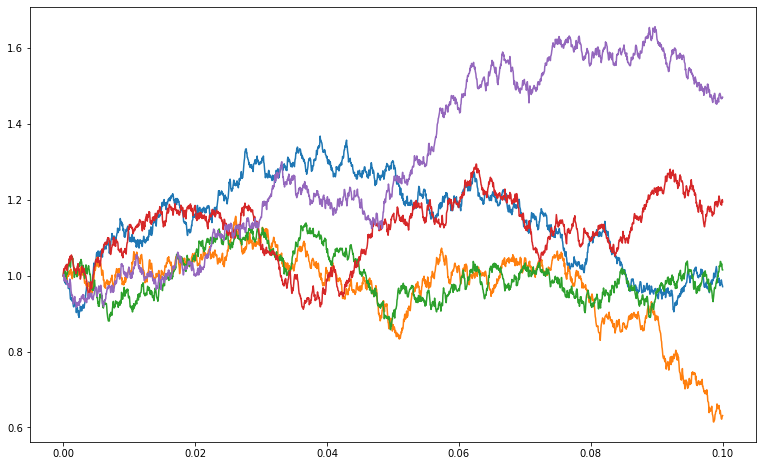

In [10]:
A.simulate()
A.plot(5, B=False)

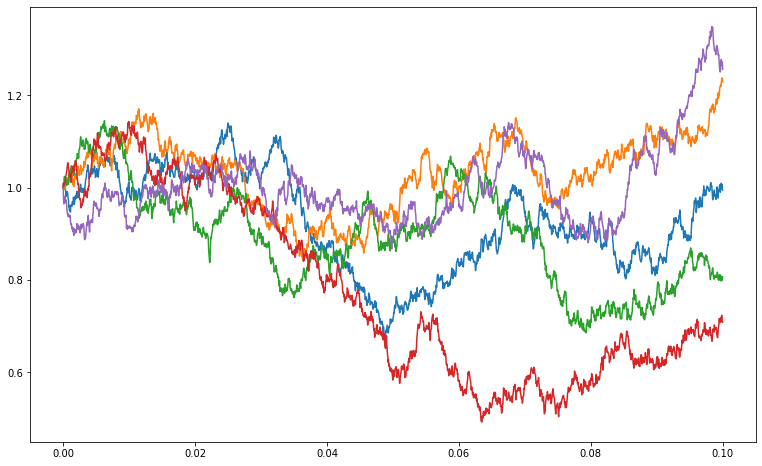

In [11]:
B.simulate()
B.plot(5,B=False)

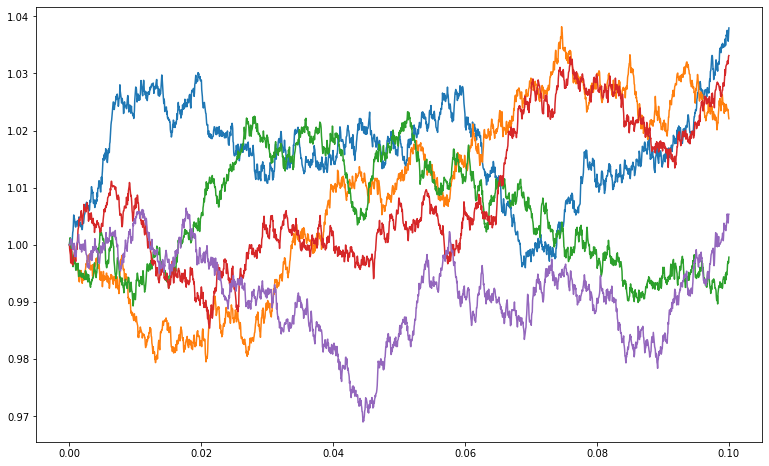

In [12]:
C.simulate()
C.plot(5,B=False)

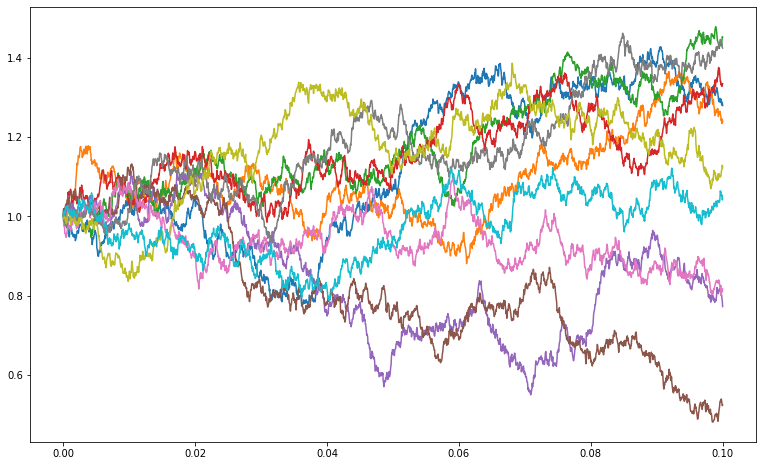

In [13]:
D.simulate()
D.plot(10,B=False)

Prices of call options with strike 1

In [14]:
print(A.call_price(10,1))
print(B.call_price(10,1))
print(C.call_price(10,1))
print(D.call_price(10,1))

0.12821241258128452
0.12438862162183502
0.012594875570764488
0.13361563000111001


Graphs of cumulative distribution functions of r_T

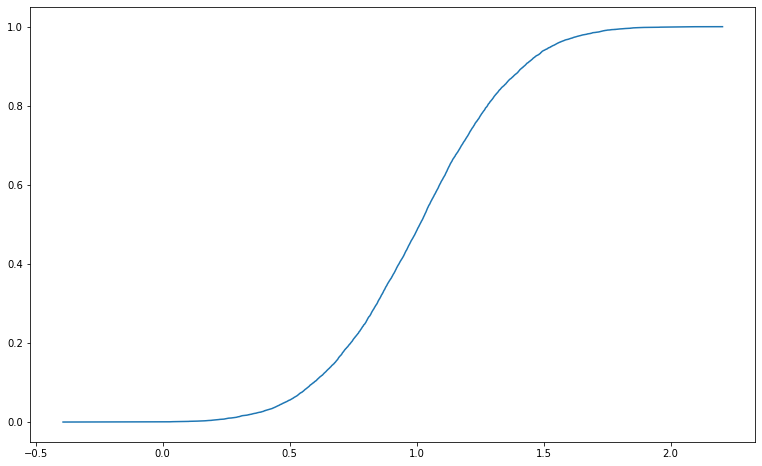

In [15]:
A.simulate()
_=A.cdf(10,True)

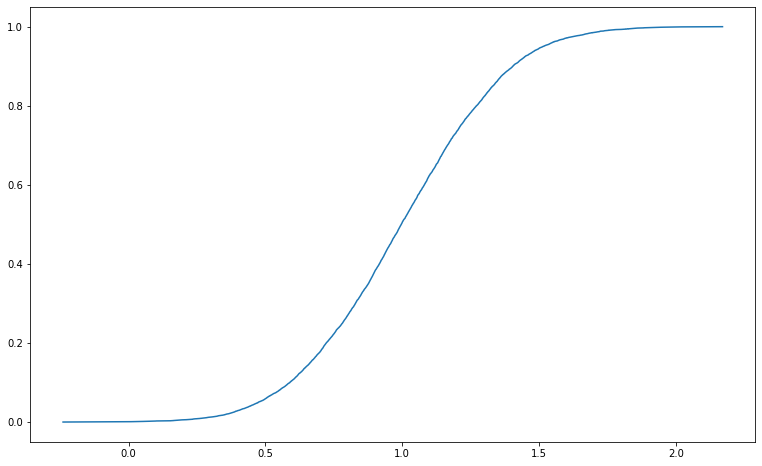

In [16]:
B.simulate()
_=B.cdf(10,True)

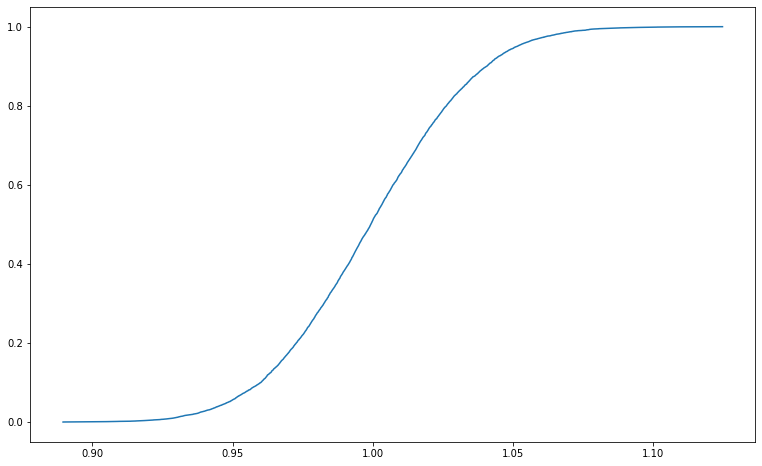

In [17]:
C.simulate()
_=C.cdf(10,True)

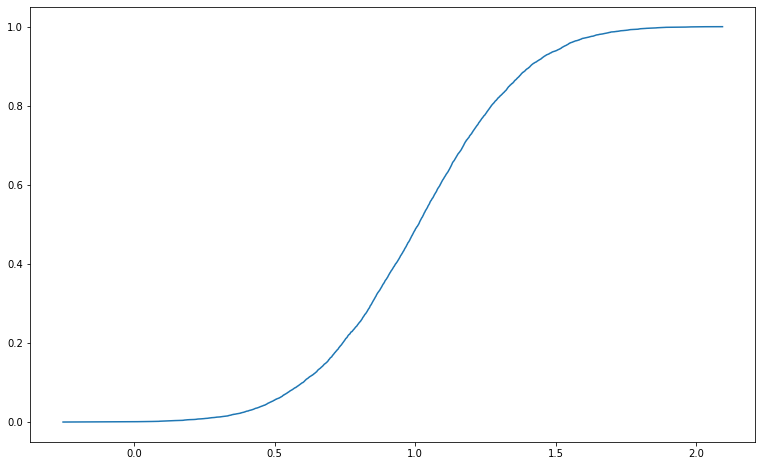

In [18]:
D.simulate()
_=D.cdf(10,True)

Graphs of B_t - cumulated capital 

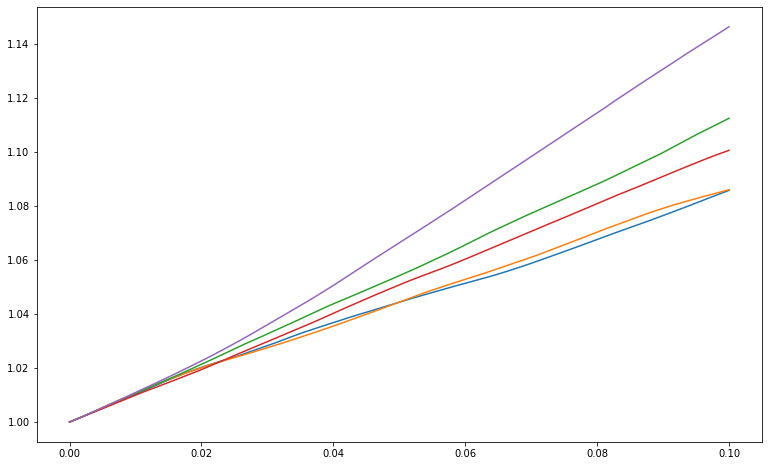

In [19]:
A.Bt()
A.plot(5, B=True)

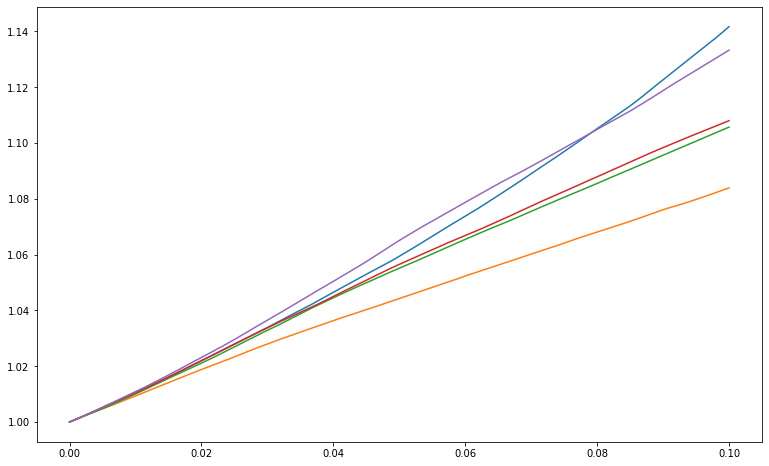

In [20]:
B.Bt()
B.plot(5, B=True)

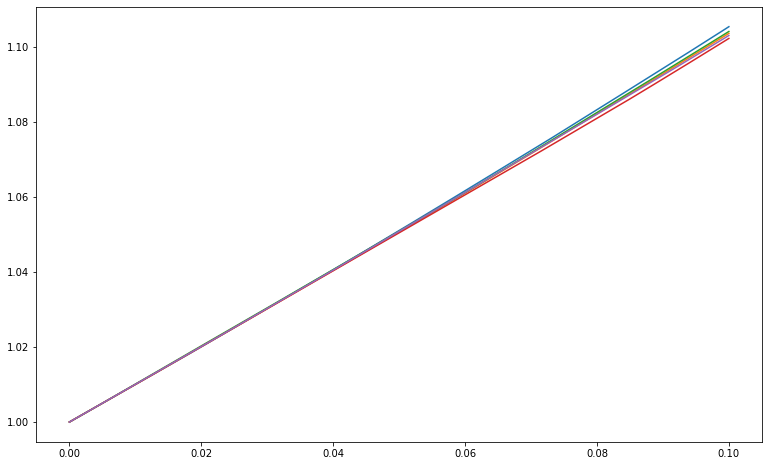

In [21]:
C.Bt()
C.plot(5, B=True)

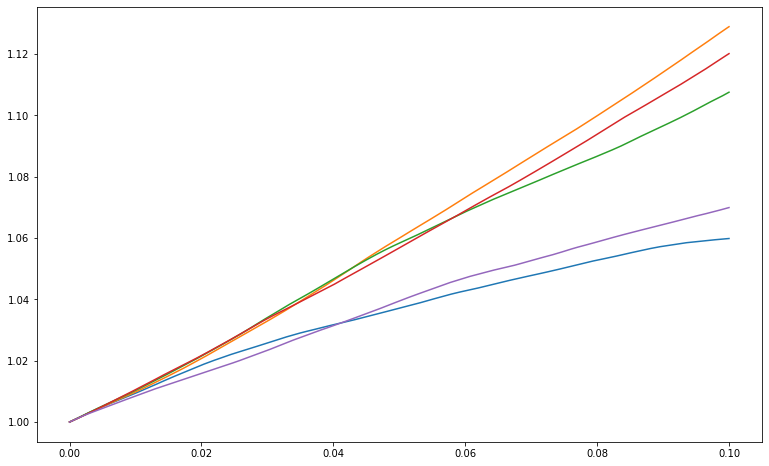

In [22]:
D.Bt()
D.plot(5, B=True)

In [23]:
clear_output(wait=True)



In [24]:
def przycisk(n, N, T, r_0, a, sgm, b, me, me2, k):
    if me=="Milstein":
        if me2=="Plot of r":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=MertonModel(n,N,T, r_0, a, sgm)
            M.simulate()
            M.plot(n, B=False)
        if me2=="Plot of B":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=MertonModel(n,N,T, r_0, a, sgm)
            M.simulate()
            M.Bt()
            M.plot(n, B=True)
        if me2=="CDF r":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=MertonModel(n,N,T, r_0, a, sgm)
            M.simulate()
            M.cdf(1,True)
        if me2=="Call option price":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=MertonModel(n,N,T, r_0, a, sgm)
            print(M.call_price(1,k))
    if me=="Vasicek":
        if me2=="Plot of r":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=VasicekModel(n, N,T, r_0, a,b, sgm)
            M.simulate()
            M.plot(n, B=False)
        if me2=="Plot of B":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=VasicekModel(n, N,T, r_0, a,b, sgm)
            M.simulate()
            M.Bt()
            M.plot(n, B=True)
        if me2=="CDF r":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=VasicekModel(n, N,T, r_0, a,b, sgm)
            M.simulate()
            M.cdf(1,True)
        if me2=="Call option price":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=VasicekModel(n, N,T, r_0, a,b, sgm)
            print(M.call_price(1,k))
    if me=="CIR":
        if me2=="Plot of r":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=CIRModel(n, N,T, r_0, a,b, sgm)
            M.simulate()
            M.plot(n, B=False)
        if me2=="Plot of B":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=CIRModel(n, N,T, r_0, a,b, sgm)
            M.simulate()
            M.Bt()
            M.plot(n, B=True)
        if me2=="CDF r":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=CIRModel(n, N,T, r_0, a,b, sgm)
            M.simulate()
            M.cdf(1,True)
        if me2=="Call option price":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=CIRModel(n, N,T, r_0, a,b, sgm)
            print(M.call_price(1,k))
    if me=="Hull-White":
        if me2=="Plot of r":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=HullWhiteModel(n, N,T, r_0, a, sgm)
            M.simulate()
            M.plot(n, B=False)
        if me2=="Plot of B":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=HullWhiteModel(n, N,T, r_0, a, sgm)
            M.simulate()
            M.Bt()
            M.plot(n, B=True)
        if me2=="CDF r":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=HullWhiteModel(n, N,T, r_0, a, sgm)
            M.simulate()
            M.cdf(1,True)
        if me2=="Call option price":
            clear_output(wait=True)
            display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))
            M=HullWhiteModel(n, N,T, r_0, a, sgm)
            M.simulate()
            print(M.call_price(1,k))
def przycisk2(x):
    if x!=None:
        przycisk(n.value,N.value, T.value, r_0.value, a.value,sigma.value,b.value,b1.value,b3.value,k.value)


In [25]:

a = widgets.FloatSlider(value=0.3, min=0.0, max=3.0,
    step=0.2, description='a:', continuous_update=False)
b = widgets.FloatSlider(value=0.6, min=0.0, max=2.0,
    step=0.2, description='b:', continuous_update=False)
sigma = widgets.FloatSlider(value=0.3, min=0.01, max=3.0,
    step=0.2, description='sigma:', continuous_update=False)
T = widgets.FloatSlider(value=0.1, min=0.001, max=20.0,
    step=0.2, description='CzasKoncowy:', continuous_update=False)
r_0 = widgets.FloatSlider(value=0.5, min=0.1, max=3.0,
    step=0.2, description='r_0:', continuous_update=False)
N = widgets.IntSlider(value=1000, min=0.0, max=20000,
     description='Kroki:', continuous_update=False)
n = widgets.IntSlider(value=3, min=0.0, max=2000,
     description='n:', continuous_update=False)
k = widgets.FloatSlider(value=3, min=0.0, max=5.0,
     description='Strike opcji call:', continuous_update=False)

c1 = widgets.HBox(children=[a, b,sigma ])
c2 = widgets.HBox(children=[r_0, T ])
c3 = widgets.HBox(children=[n,N])
c4 = widgets.HBox(children=[k])
b1=widgets.RadioButtons(
    options=['Milstein',"Vasicek","CIR","Hull-White"],
    description='Model:',
    disabled=False
)
b3=widgets.RadioButtons(
    options=['Plot of r',"Plot of B","CDF r","Call option price"],
    description='Show:',
    disabled=False
)


b2 = widgets.Button(
    description='Generate',
    disabled=False,
    button_style='', 
 
)

b2.on_click(przycisk2)





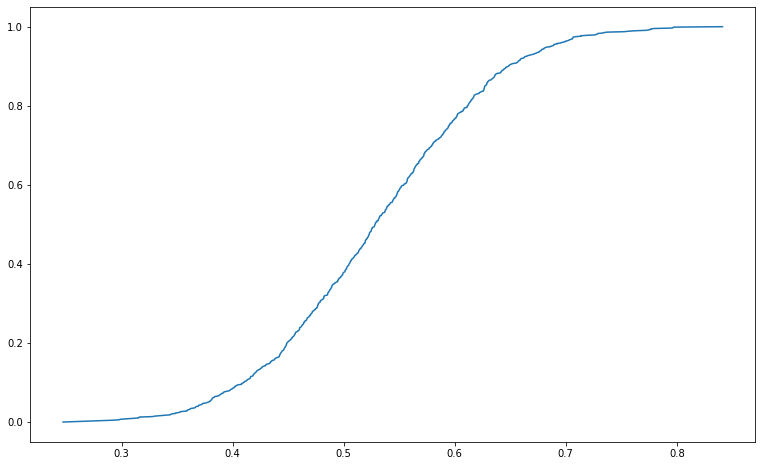

In [26]:
display(widgets.VBox([c1, c2, c3,c4,b1,b3,b2]))